# Random Forest 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/8_Ensemble_Random_Forest/random_forest.ipynb)

**Task:** Predict concrete comprensive strength in MPa (Mega Pascals) given a number of features such as cement, ash, water etc. using random forest regressor. 

The [Concrete Compressive Strength Data Set](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength) is a collection of measurements of the compressive strength of concrete. It is available on the UCI Machine Learning Repository and contains data from 1030 samples of concrete, with eight input features such as cement, water, and coarse aggregate, and a single output variable, the compressive strength.

Explanation of each variable in the Concrete Compressive Strength Dataset:

1. Cement (kg/m3): The amount of cement used in the concrete mixture, measured in kilograms per cubic meter.

2. Blast Furnace Slag (kg/m3): The amount of blast furnace slag used in the concrete mixture, measured in kilograms per cubic meter.

3. Fly Ash (kg/m3): The amount of fly ash used in the concrete mixture, measured in kilograms per cubic meter.

4. Water (kg/m3): The amount of water used in the concrete mixture, measured in kilograms per cubic meter.

5. Superplasticizer (kg/m3): The amount of superplasticizer used in the concrete mixture, measured in kilograms per cubic meter.

6. Coarse Aggregate (kg/m3): The amount of coarse aggregate (such as gravel or crushed stone) used in the concrete mixture, measured in kilograms per cubic meter.

7. Fine Aggregate (kg/m3): The amount of fine aggregate (such as sand) used in the concrete mixture, measured in kilograms per cubic meter.

8. Age (days): The age of the concrete sample at the time of testing, measured in days.

9. Concrete Compressive Strength (MPa): The compressive strength of the concrete sample, measured in megapascals (MPa). This is the target variable that we are trying to predict.

In [9]:
#import relevant packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
#import data from local directory
df = pd.read_csv("https://raw.githubusercontent.com/kashifliaqat/Data_Science_and_Machine-Learning/main/Supervised_Learning/3_Single_Neuron_Linear_Regression/dataset/Concrete_Data.csv")

#### Data Visualization and Exploration
A detailed visualization and exploration of the dataset can be found in the [Single_Neuron_Regression](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/3_Single_Neuron_Linear_Regression/regression.ipynb) notebook.

In [11]:
# Show the first 5 rows of the dataset
print(df.head())
print("Target Variable is Strength (Compressive strength of Concrete in MPa)")

   Cement   Slag  Ash  Water  Superplasticizer  Coarse   Fine  Age  Strength
0   540.0    0.0  0.0  162.0               2.5  1040.0  676.0   28     79.99
1   540.0    0.0  0.0  162.0               2.5  1055.0  676.0   28     61.89
2   332.5  142.5  0.0  228.0               0.0   932.0  594.0  270     40.27
3   332.5  142.5  0.0  228.0               0.0   932.0  594.0  365     41.05
4   198.6  132.4  0.0  192.0               0.0   978.4  825.5  360     44.30
Target Variable is Strength (Compressive strength of Concrete in MPa)


### Data Splitting and Scaling
Split the data into test and train sets. 

In [12]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)



### Model Building and Training

Stepwise implementation of the Random Forest Regressor model:

1. Build a random forest regressor model using the `RandomForestRegressor` class from the `sklearn.ensemble` module. The `n_estimators` parameter is set to 150, which means the model will build 150 decision trees.
2. Fit the model to the training data using the `fit()` method. This step involves training each decision tree on a randomly selected subset of the training data, and a randomly selected subset of the features.
3. Perform cross-validation using the `cross_val_score()` function from the `sklearn.model_selection` module. Cross-validation is a technique for assessing how well a model generalizes to new data. It involves splitting the data into K-folds, where K is the number of folds. The model is trained on K-1 folds and evaluated on the remaining fold. This process is repeated K times, so that each fold is used once for evaluation. The `cross_val_score()` function returns an array of scores, where each score is the R-squared value for one fold of the cross-validation. The `scoring` parameter is set to 'r2', which means that the R-squared metric is used to evaluate the model.

In [13]:
# Build a Random Forest model
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

# Perform K-Fold Cross Validation
k = 5
cv_results = cross_val_score(rf, X_train, y_train, cv=k, scoring='r2')

#### Perfromance Evaluation

In [14]:
# Calculate training error
y_pred_train = rf.predict(X_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate testing error
y_pred_test = rf.predict(X_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print("Training MAPE: {:.2f}%, MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mape_train, mae_train, mse_train, r2_train))
print("Testing MAPE: {:.2f}%, MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mape_test, mae_test, mse_test, r2_test))
print("K-Fold CV R2 Scores: {}".format(cv_results))
print("Mean K-Fold CV R2: {:.2f}".format(np.mean(cv_results)))

Training MAPE: 4.81%, MAE: 1.36, MSE: 4.13, R2: 0.99
Testing MAPE: 12.80%, MAE: 3.75, MSE: 29.82, R2: 0.89
K-Fold CV R2 Scores: [0.91861938 0.89768029 0.90402608 0.87625044 0.90413641]
Mean K-Fold CV R2: 0.90


### Visualization of Predicted vs Actual Values

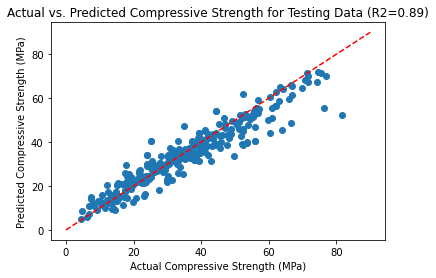

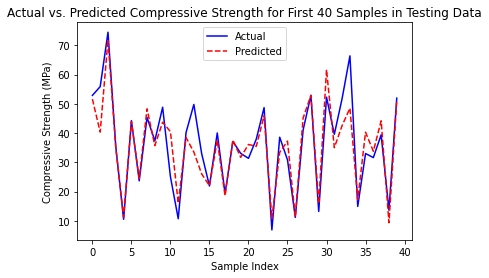

In [15]:
# Plot actual vs predicted values for testing data
plt.scatter(y_test, y_pred_test)
plt.plot([0, 90], [0, 90], 'r--')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Compressive Strength for Testing Data (R2={:.2f})'.format(r2_test))
plt.show()

# Plot actual vs predicted values for samples in testing data
n_samples = 40
indices = np.arange(n_samples)
plt.plot(indices, y_test[:n_samples], 'b-', label='Actual')
plt.plot(indices, y_pred_test[:n_samples], 'r--', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Compressive Strength for First {} Samples in Testing Data'.format(n_samples))
plt.legend()
plt.show()

### Hyperparameter Tuning using GridSearchCV
GridSearchCV is a hyperparameter tuning method that is used to find the optimal hyperparameters for a model. It is an exhaustive search over specified parameter values for an estimator. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 3.8195158591496097
Training MAPE: 4.85%, MAE: 1.36, MSE: 4.13, R2: 0.99
Testing MAPE: 12.78%, MAE: 3.74, MSE: 29.76, R2: 0.89


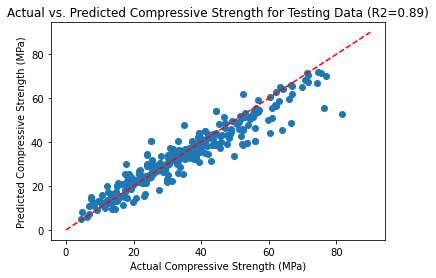

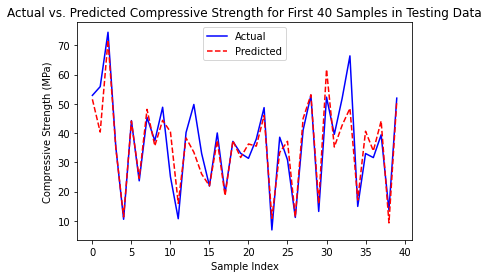

In [16]:
# Creating a random forest regressor object
rf_reg = RandomForestRegressor(random_state=42)

# Defining the parameter grid for GridSearchCV
params = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}

# Creating a GridSearchCV object
grid_reg = GridSearchCV(rf_reg, params, cv=5, scoring='neg_mean_absolute_error')

# Fitting the GridSearchCV object on the training data
grid_reg.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best Parameters:", grid_reg.best_params_)
print("Best Score:", -grid_reg.best_score_)

# Predicting the values on training and testing sets
y_train_pred = grid_reg.predict(X_train)
y_test_pred = grid_reg.predict(X_test)

# Calculating the mean absolute percentage error on training and testing sets
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Calculating the mean absolute error on training and testing sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating the mean squared error on training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculating the R-squared score on training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Training MAPE: {:.2f}%, MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mape_train, mae_train, mse_train, r2_train))
print("Testing MAPE: {:.2f}%, MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mape_test, mae_test, mse_test, r2_test))

# Plot actual vs predicted values for testing data
plt.scatter(y_test, y_test_pred)
plt.plot([0, 90], [0, 90], 'r--')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Compressive Strength for Testing Data (R2={:.2f})'.format(r2_test))
plt.show()

# Plot actual vs predicted values for samples in testing data
n_samples = 40
indices = np.arange(n_samples)
plt.plot(indices, y_test[:n_samples], 'b-', label='Actual')
plt.plot(indices, y_test_pred[:n_samples], 'r--', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Compressive Strength for First {} Samples in Testing Data'.format(n_samples))
plt.legend()
plt.show()

#### Conclusion
- The Random Forest Regressor is able to predict the concrete compressive strength with a mape of 12.78%
- The test MSE is found to be 29.76. This is significantly lower than the MSE (98.27) reported using [Single Neuron Linear Regression](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/3_Single_Neuron_Linear_Regression/regression.ipynb).  